In [1]:
library(ggplot2)
library(boot)

In [2]:
base_path <- getwd()
setwd(base_path)
set.seed(42)

### VÍ DỤ 1:
- Surimi là protein cá tinh khiết được sử dụng làm nguyên liệu để sản xuất các sản phẩm thức ăn giả cua, tôm. Độ bền của gel surimi là yếu tố quan trọng trong sản xuất. Mỗi lô nguyên liệu surimi đầu vào đều được lấy mẫu và chuẩn bị gel nấu chín.
- Từ các gel này, các phần mẫu thử được chọn và kiểm tra độ bền.
- Dữ liệu cung cấp quan sát về ứng suất giới hạn được đo để xuyên qua các phần thử nghiệm của 40 lô surimi
đầu vào.
- Dữ liệu được cung cấp bởi:


In [3]:
# Dữ liệu mẫu
surimi <- c(41.28, 45.16, 34.75, 40.76, 43.61, 39.05, 41.20, 41.02, 41.33,
            40.61, 40.49, 41.77, 42.07, 44.83, 29.12, 45.59, 41.95, 45.78,
            42.89, 40.42, 49.31, 44.01, 34.87, 38.60, 39.63, 38.52, 38.52,
            43.95, 49.08, 50.52, 43.85, 40.64, 45.86, 41.25, 50.35,
            45.18, 39.67, 43.89, 43.89, 42.16)
# Độ tin cậy alpha
alpha = 0.05

In [4]:
# Trung bình của mẫu
mu_surimi = mean(surimi)
mu_surimi

[1] 42.18575

In [5]:
n_surimi <- length(surimi)
n_surimi

[1] 40

In [6]:
nR <- 1000 # Số mẫu Boostrap
mu_surimi_boot <- numeric(nR)
set.seed(23)
for (i in 1:nR) {
id_boot <- sample(1:n_surimi, size = n_surimi, replace = TRUE)
surimi_boot <- surimi[id_boot]
mu_surimi_boot[i] <- mean(surimi_boot)
}

In [7]:
# Trung bình của 1000 mẫu bootstrap
mean(mu_surimi_boot)

[1] 42.19616

In [8]:
# ĐỘ chệch:
b_surimi = mean(mu_surimi_boot) - mean(surimi)
b_surimi

[1] 0.01041225

In [9]:
# Độ lệch chuẩn bootstrap
se_surimi_boot = sd(mu_surimi_boot)
se_surimi_boot

[1] 0.6368986

In [10]:
# Vậy khoảng tin cậy 95% cho trung bình ứng suất của 1 mẫu surimi:
ci_surimi_norm_bts = mu_surimi - b_surimi + c(-1,1) * se_surimi_boot * qnorm((1+0.95)/2)
 ci_surimi_norm_bts

[1] 40.92704 43.42364

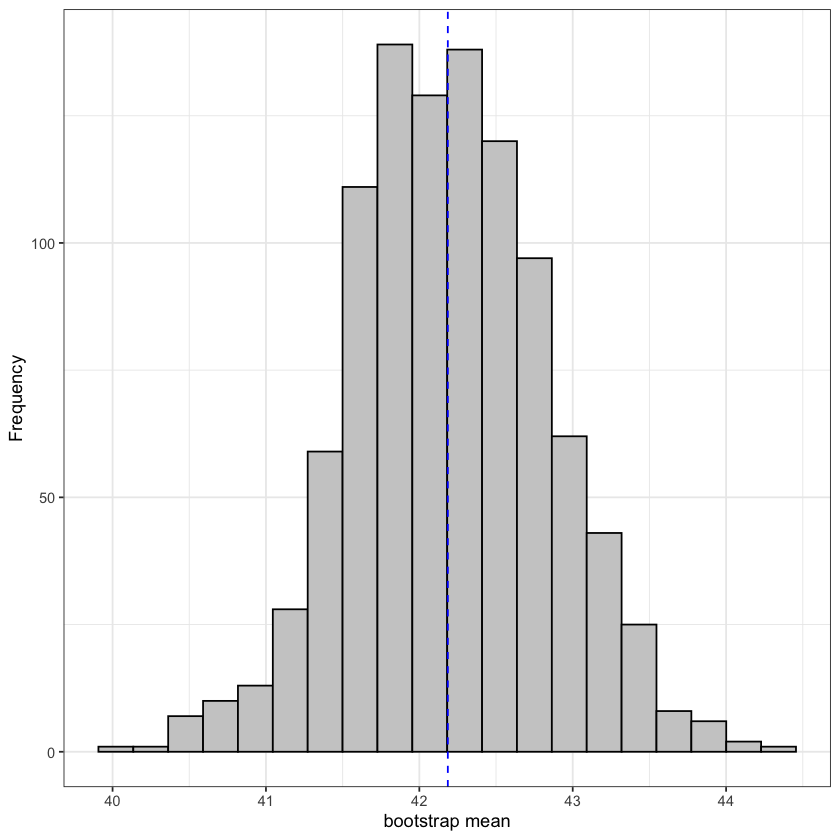

In [11]:
# Vẽ Histogram của 1000 trung bình bootstrap, bằng thư viện ggplots:
ggplot(data = data.frame(t = mu_surimi_boot), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = mean(surimi), color = "blue",
linetype = "dashed") +
xlab("bootstrap mean") + ylab("Frequency") +
theme_bw()

- Nhận xét: Ta nhận thấy rằng phân phối bootstrap xấp xỉ phân phối chuẩn. Do đó ta có thể tin tưởng vào kết quả ở trên.

#### KHOẢNG TIN CẬY BOOTSTRAP BASIC
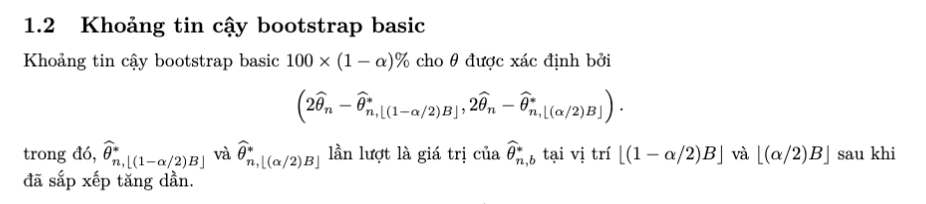

In [12]:
# Từ mẫu bootstrap ta tiến hàng sắp xếpp tăng:
mu_surimi_boot_incr = sort(mu_surimi_boot)

In [13]:
# DO đó khoảng tin cậy bootstrap basic 95% cho trung bình ứng suất của 1 mẫu surimi là
ci_surimi_basic_bts = 2*mu_surimi - mu_surimi_boot_incr[floor(nR*c(1-alpha/2, alpha/2))]
ci_surimi_basic_bts

[1] 40.8970 43.4625

#### KHOẢNG TIN CẬP BOOTSTRAP PERCENTILE
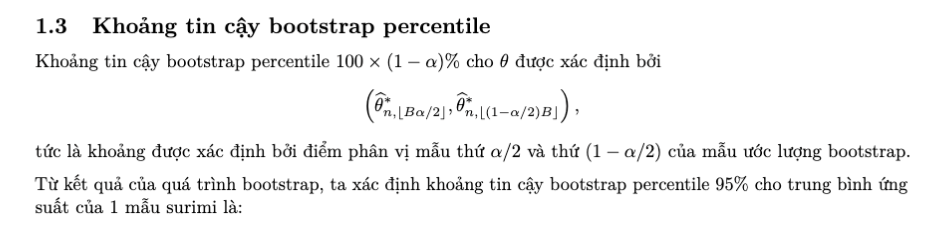

In [14]:
ci_surimi_perc_bts = mu_surimi_boot_incr[floor(nR*c(alpha/2, 1-alpha/2))]
ci_surimi_perc_bts

[1] 40.9090 43.4745

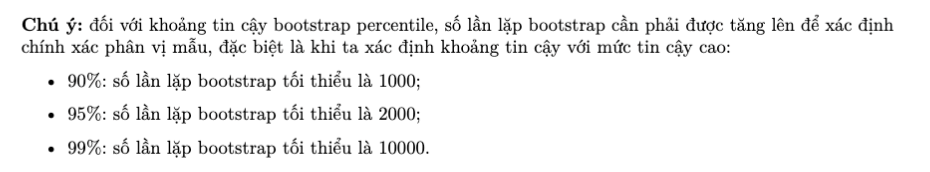

#### KHOẢNG TIN CẬP BOOTSTRA STUDENTIZED
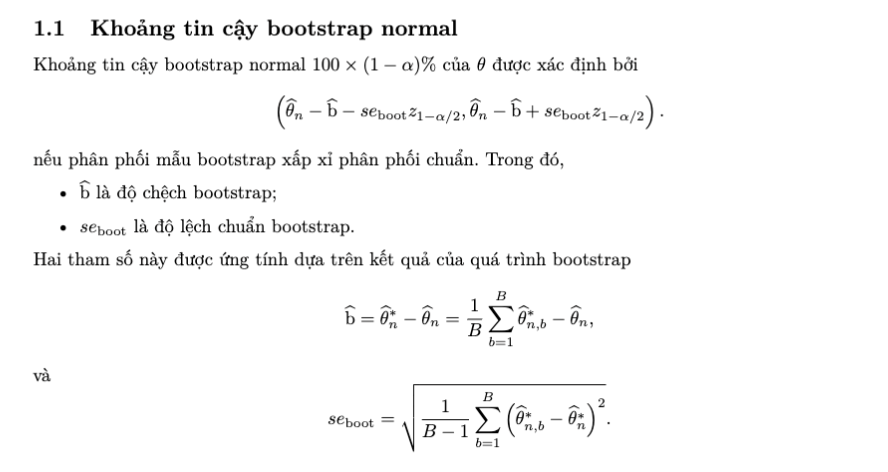

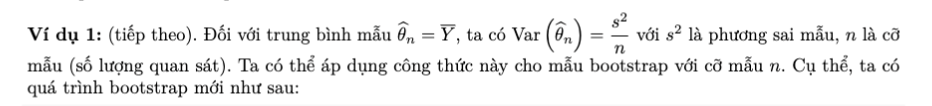

In [15]:
mu_surimi_boot = numeric(nR)
se_mu_surimi_boot = numeric(nR)
for (i in 1:nR){
    id_boot = sample(1:n_surimi, size = n_surimi, replace = TRUE)
    surimi_boot = surimi[id_boot]
    mu_surimi_boot[i] = mean(surimi_boot)
    se_mu_surimi_boot[i] = sd(surimi_boot)/sqrt(n_surimi)
}


In [16]:
# median_surimi_boot = numeric(nR)
# se_median_surimi_boot = numeric(nR)
# for (i in 1:nR){
#     id_boot = sample(1:n_surimi, size = n_surimi, replace = TRUE)
#     surimi_boot = surimi[id_boot]
#     median_surimi_boot[i] = median(surimi_boot)

#     # For var
#     res_se_median_surimi_boot = numeric(200)
#     # se_mu_surimi_boot[i] = sd(surimi_boot)/sqrt(n_surimi)
#     for (j in 1:200){
#         id_boot_var = sample(1:n_surimi, size = n_surimi, replace = TRUE)
#         surimi_boot_2 = surimi[id_boot_var]
#         res_se_median_surimi_boot[j] = median(surimi_boot_2)
#     }
#     se_median_surimi_boot[i] = sd(res_se_median_surimi_boot)
# }


In [17]:
# Khi này ta tính được Z*
z_surimi_boot = (mu_surimi_boot - mu_surimi)/se_mu_surimi_boot

In [18]:
# Khi đó hai phân vị mẫu thứ 0.025 và 0.975 là:
z_surimi_boot_qt_095 <- sort(z_surimi_boot)[floor(nR*c(1 - 0.05/2 , 0.05/2))]
z_surimi_boot_qt_095

[1]  2.123667 -2.051947

In [19]:
# Như vậy khoảng tin cậy bootstrap studentized 95% cho trung bình ứng suất của 1 mẫu surimi là:
se_mu_surimi <- sd(surimi)/sqrt(n_surimi)
ci_surimi_stud_bts <- mu_surimi - se_mu_surimi*z_surimi_boot_qt_095
ci_surimi_stud_bts


[1] 40.78922 43.53511

### SỬ DỤNG THƯ VIỆN BOOT

In [20]:
mean_boot_fun <- function(data, ind){
n <- length(data)
data <- data[ind]
mu_est <- mean(data)
mu_var <- var(data)/n
return(c(mu_est, mu_var))
}

In [21]:
set.seed(23)
out_surimi_boot = boot(data =surimi,
statistic = mean_boot_fun,
R = 1000
)
out_surimi_boot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = surimi, statistic = mean_boot_fun, R = 1000)


Bootstrap Statistics :
      original      bias    std. error
t1* 42.1857500  0.01041225   0.6665058
t2*  0.4324401 -0.01383410   0.1283590

In [22]:
# Khoảng tin cậy bootsrap 95% cho trung bình ứng suất của 1 mẫu surimi là:
boot.ci(out_surimi_boot, conf = 0.95, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_surimi_boot, conf = 0.95, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
95%   (40.87, 43.48 )   (40.90, 43.46 )   (40.77, 43.48 )  

Level     Percentile            BCa          
95%   (40.91, 43.47 )   (40.78, 43.38 )  
Calculations and Intervals on Original Scale

# BÀI TẬP

### BÀI TẬP 1:
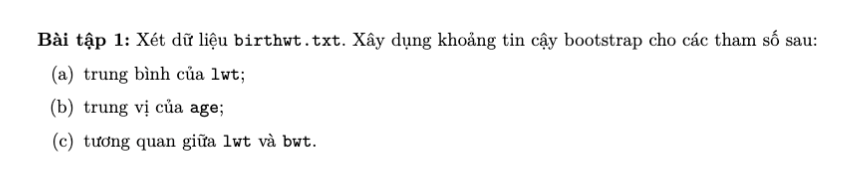

In [23]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "../datasets/birthwt.txt", sep ="/")
birthwt <- read.table(file = path, header = TRUE)
head(birthwt)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,19,182,2,0,0,0,1,0,2523
2,0,33,155,3,0,0,0,0,3,2551
3,0,20,105,1,1,0,0,0,1,2557
4,0,21,108,1,1,0,0,1,2,2594
5,0,18,107,1,1,0,0,1,0,2600
6,0,21,124,3,0,0,0,0,0,2622


#### a. Trung bình của lwt

In [24]:
# mu_surimi_boot = numeric(nR)
# se_mu_surimi_boot = numeric(nR)
# for (i in 1:nR){
#     id_boot = sample(1:n_surimi, size = n_surimi, replace = TRUE)
#     surimi_boot = surimi[id_boot]
#     mu_surimi_boot[i] = mean(surimi_boot)
#     se_mu_surimi_boot[i] = sd(surimi_boot)/sqrt(n_surimi)
# }


In [25]:
boot_mu_fun <- function(data, ind){
data_new <- data[ind]
n = length(data_new)
out_mean <- mean(data_new)
out_var = var(data_new)/n
return(c(out_mean, out_var))
}

In [26]:
set.seed(42)
out_lwt <- boot(data = birthwt$lwt, statistic = boot_mu_fun, R = 1000)
out_lwt


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = birthwt$lwt, statistic = boot_mu_fun, R = 1000)


Bootstrap Statistics :
      original      bias    std. error
t1* 129.814815  0.02031217   2.2332959
t2*   4.947611 -0.03148894   0.7378149

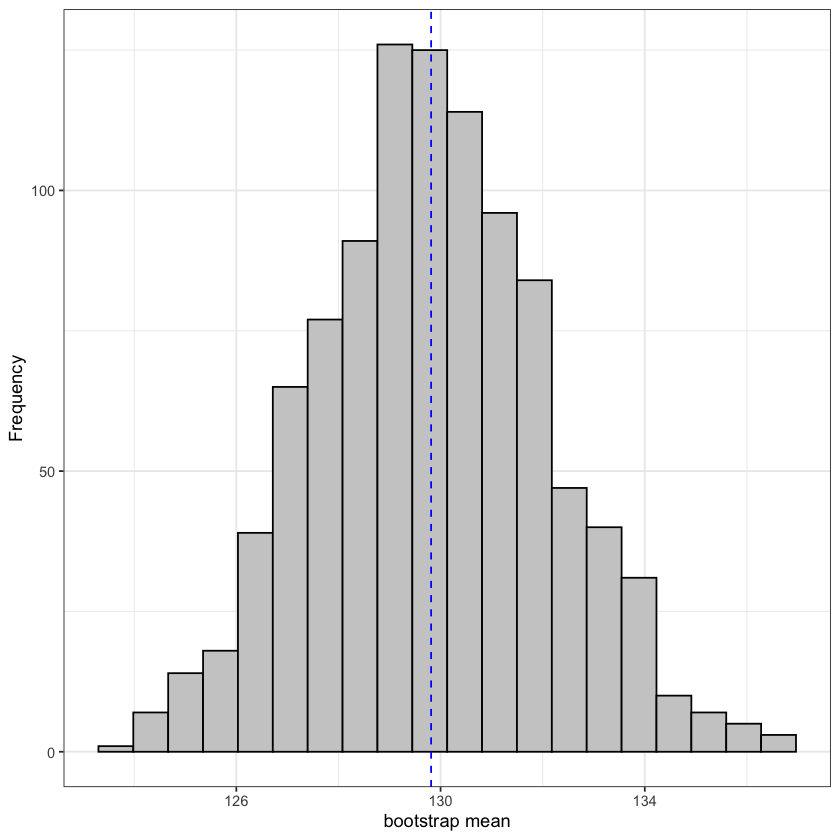

In [27]:
ggplot(data = data.frame(t = out_lwt$t[,1]), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = out_lwt$t0[1], color = "blue", linetype = "dashed") +
xlab("bootstrap mean") + ylab("Frequency") +
theme_bw()

In [28]:
# Khoảng tin cậy bootsrap 95% cho trung bình ứng suất của lwt:
boot.ci(out_lwt, conf = 0.95, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_lwt, conf = 0.95, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
95%   (125.4, 134.2 )   (125.4, 134.2 )   (125.7, 134.7 )  

Level     Percentile            BCa          
95%   (125.5, 134.2 )   (125.9, 134.4 )  
Calculations and Intervals on Original Scale

#### b. Trung vị của age

In [29]:
# nR = 1000
# median_age_boot = numeric(nR)
# se_median_age_boot = numeric(nR)
# n_age = nrow(birthwt)
# for (i in 1:nR){
#     id_boot = sample(1:n_age, size = n_age, replace = TRUE)
#     age_boot = birthwt$age[id_boot]
#     median_age_boot[i] = median(age_boot)
#     # Tính Var
#     res_se_median_age_boot = numeric(200)
#     for (j in 1:200){
#         id_boot_var = sample(1:n_age, size = n_age, replace = TRUE)
#         age_boot_2 = birthwt$age[id_boot_var]
#         res_se_median_age_boot[j] = median(age_boot_2)
#     }
#     se_median_age_boot[i] = sd(res_se_median_age_boot)
# }


In [30]:
boot_median_fun <- function(data, ind){
data_new <- data[ind]
out_median <- median(data_new)
n_age = length(data_new)
# Tính Var
res_se_median_age_boot = numeric(200)
for (j in 1:200){
    id_boot_var = sample(1:n_age, size = n_age, replace = TRUE)
    age_boot_2 = data_new[id_boot_var]
    res_se_median_age_boot[j] = median(age_boot_2)
}
out_var = var(res_se_median_age_boot)
return(c(out_median, out_var))
}

In [31]:
set.seed(42)
out_age <- boot(data = birthwt$age, statistic = boot_median_fun, R = 1000)
out_age


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = birthwt$age, statistic = boot_median_fun, R = 1000)


Bootstrap Statistics :
      original      bias    std. error
t1* 23.0000000 -0.44700000   0.6415626
t2*  0.3215075  0.05775394   0.1348439

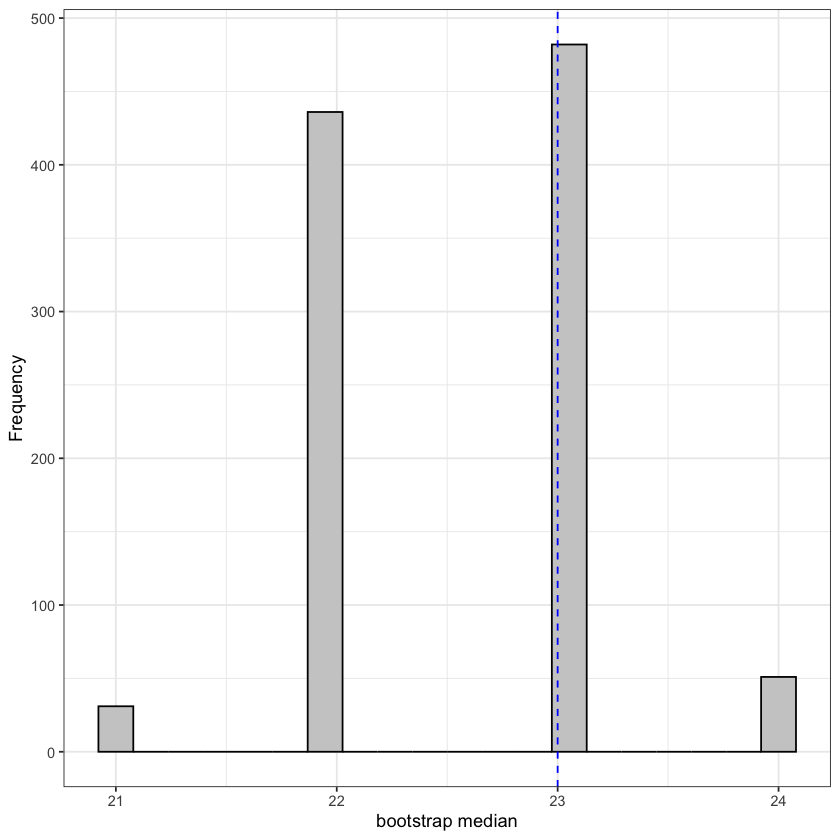

In [32]:
ggplot(data = data.frame(t = out_age$t[,1]), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = out_age$t0[1], color = "blue", linetype = "dashed") +
xlab("bootstrap median") + ylab("Frequency") +
theme_bw()

In [33]:
# Khoảng tin cậy bootsrap 95% cho trung vị ứng suất của age:
boot.ci(out_age, conf = 0.95, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_age, conf = 0.95, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
95%   (22.19, 24.70 )   (22.00, 25.00 )   (22.03, 24.71 )  

Level     Percentile            BCa          
95%   (21, 24 )   (21, 24 )  
Calculations and Intervals on Original Scale

#### c. Tương quan giữa lwt và age

In [34]:
boot_cor_fun <- function(data, ind){
data_new <- data[ind, c("lwt", "bwt")]
out_corr <- cor(data_new)[1,2]
n = nrow(data_new)
# Tính Corr
res_cor_boot = numeric(200)
for (j in 1:200){
    id_boot_cor = sample(1:n, size = n, replace = TRUE)
    corr_boot_2 = data_new[id_boot_cor,]
    res_cor_boot[j] = cor(corr_boot_2)[1,2]
}
out_var = var(res_cor_boot)
return(c(out_corr,out_var))
}

In [35]:
set.seed(42)
out_lwt_bwt <- boot(data = birthwt[, c("lwt", "bwt")], statistic = boot_cor_fun, R = 1000)
out_lwt_bwt


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = birthwt[, c("lwt", "bwt")], statistic = boot_cor_fun, 
    R = 1000)


Bootstrap Statistics :
       original       bias    std. error
t1* 0.185788709 0.0008991973 0.064911669
t2* 0.003396267 0.0008378466 0.001009734

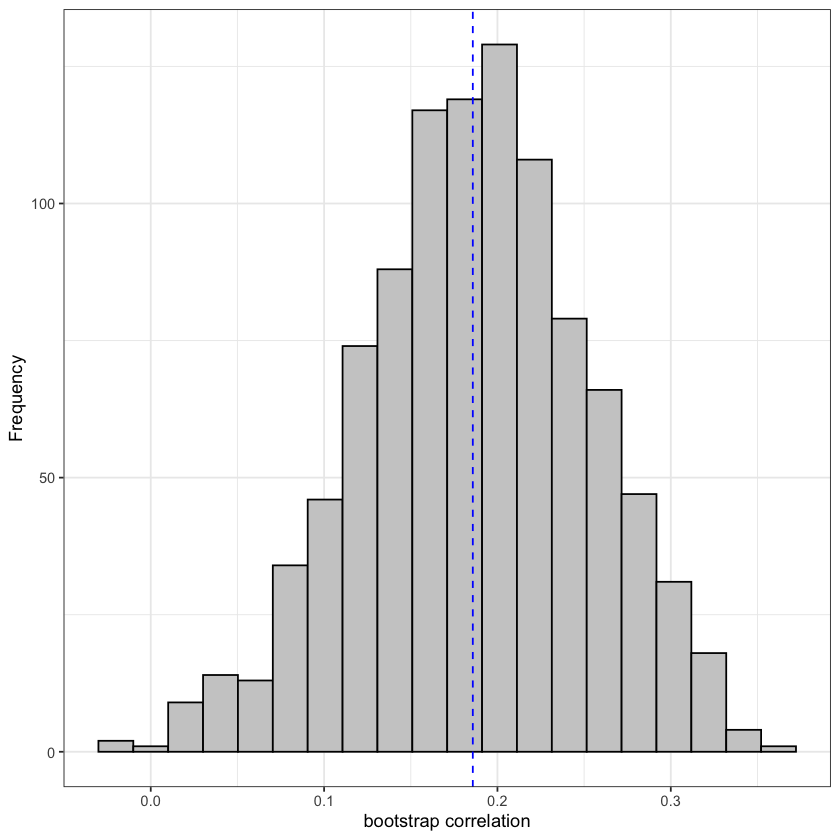

In [36]:
ggplot(data = data.frame(t = out_lwt_bwt$t[,1]), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = out_lwt_bwt$t0[1], color = "blue", linetype = "dashed") +
xlab("bootstrap correlation") + ylab("Frequency") +
theme_bw()

In [37]:
# Khoảng tin cậy bootstrap 95% cho tương quan giữa lwt và bwt:
boot.ci(out_age, conf = 0.95, type = "all")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = out_age, conf = 0.95, type = "all")

Intervals : 
Level      Normal              Basic             Studentized     
95%   (22.19, 24.70 )   (22.00, 25.00 )   (22.03, 24.71 )  

Level     Percentile            BCa          
95%   (21, 24 )   (21, 24 )  
Calculations and Intervals on Original Scale